## **Part 1.** Image Point-wise Processing and Image Filtering

## Check "How to use google drive"
https://colab.research.google.com/notebooks/io.ipynb


In [1]:
## to access the google drive with the google account
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


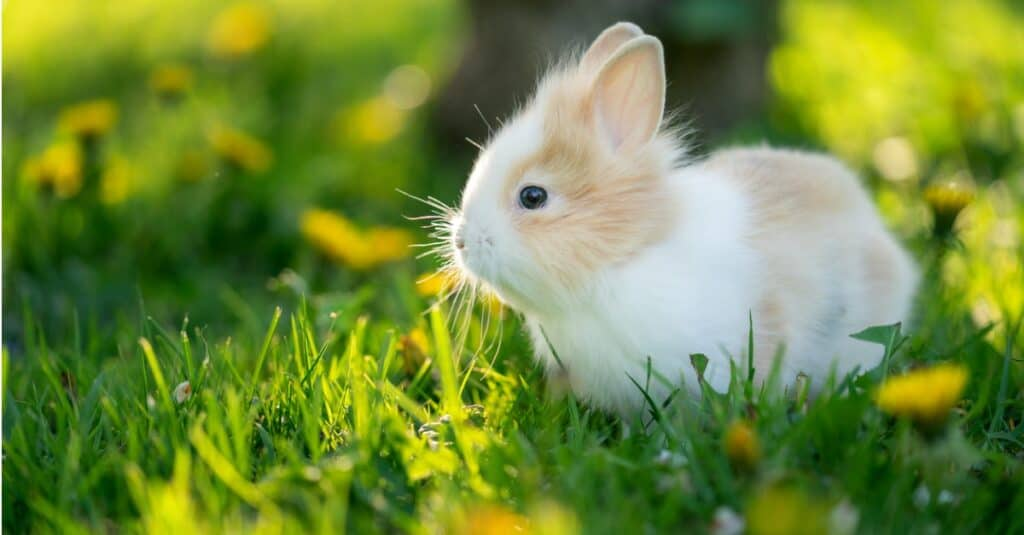

In [31]:
# Get set up
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # for image display

img_path = '/content/drive/My Drive/Colab Notebooks/Assignment1/Part1/'
img_file = 'rabbit.jpeg'

## read image from the path
img = cv2.imread(img_path+img_file)
## visualize the image
cv2_imshow(img)

### Import resources and display image

### Convert the image to grayscale

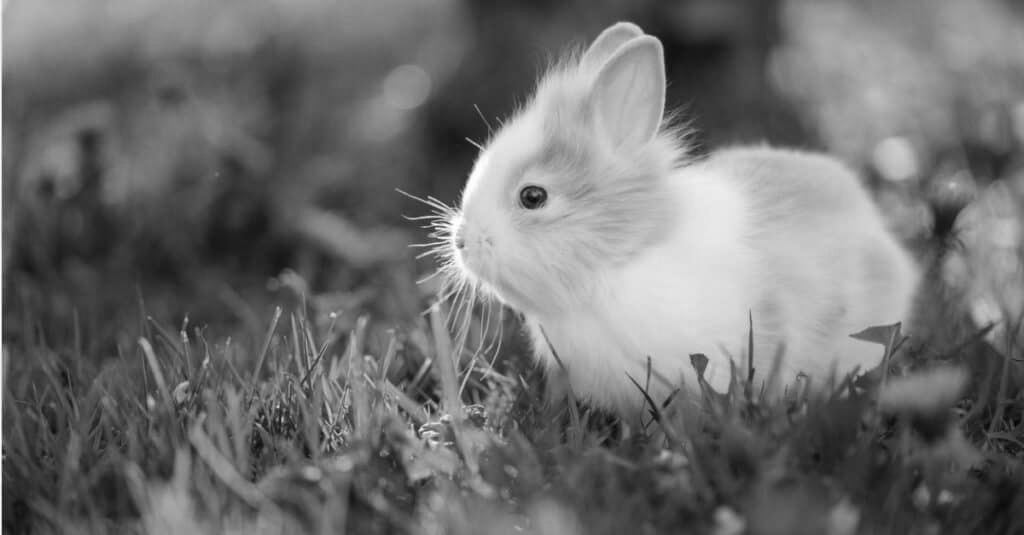

In [32]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

cv2_imshow(gray)

### Task 1: The goal is to do point-wise operations over the one-channel grayscale image.
The below is example for inverse processing.



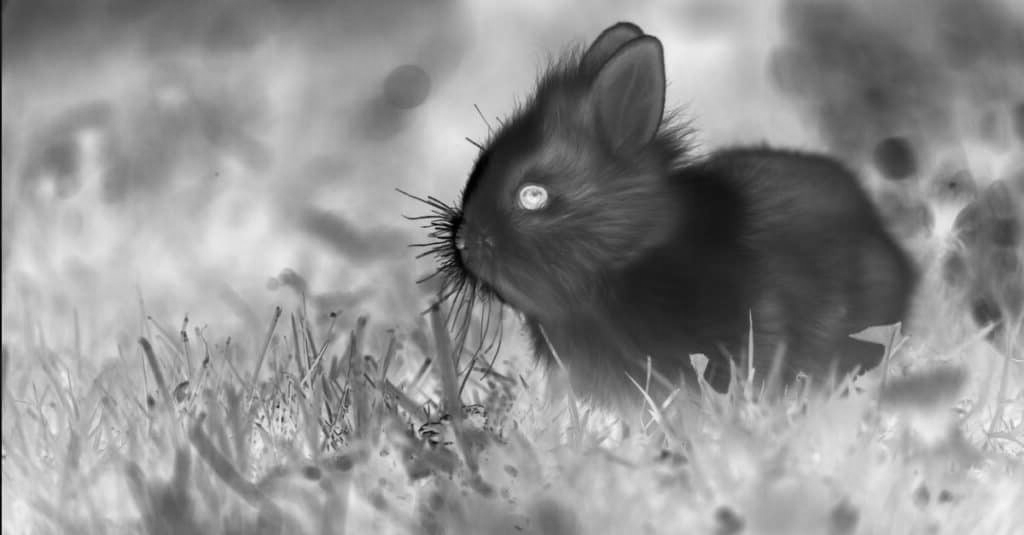

In [33]:
## Example shows the inverse version
cv2_imshow(255-gray)


### TODO: Point-wise Operations

Please follow Page 12 *Slides: Image Filter* in Module, Canvas and finish the rest 6 point-wise processing.


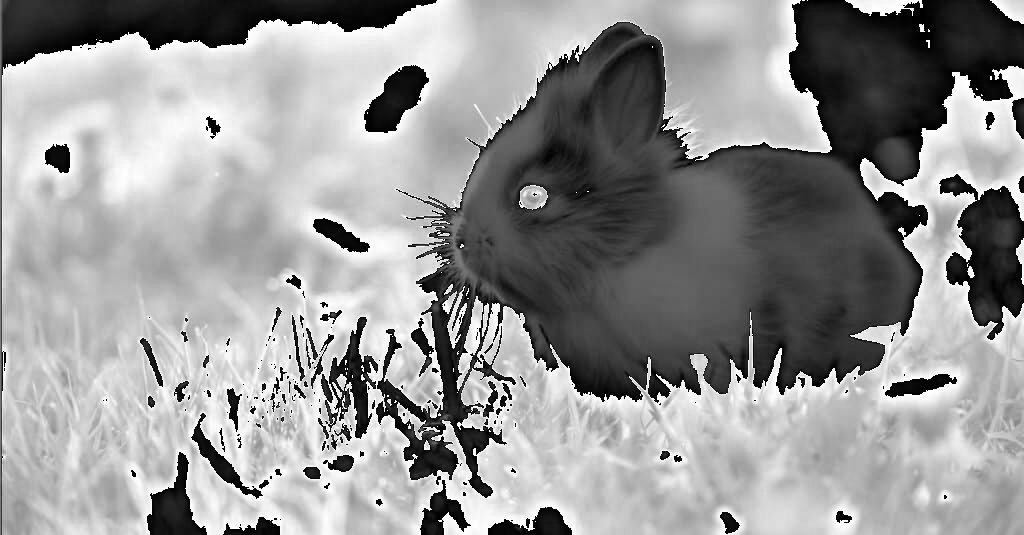

In [34]:
cv2_imshow(gray-128)

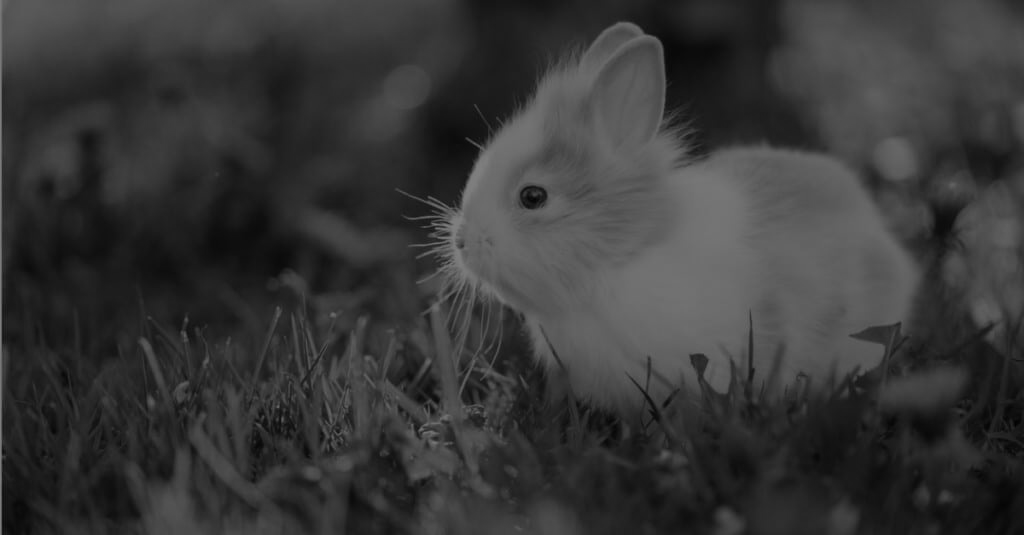

In [35]:
cv2_imshow(gray/2)

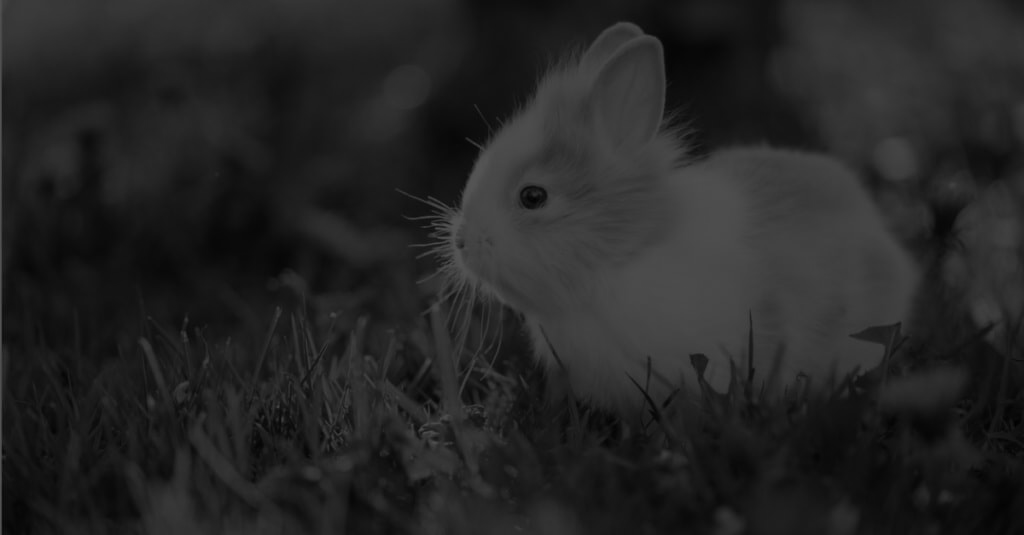

In [36]:
cv2_imshow(((gray/255)**1/3)*255)

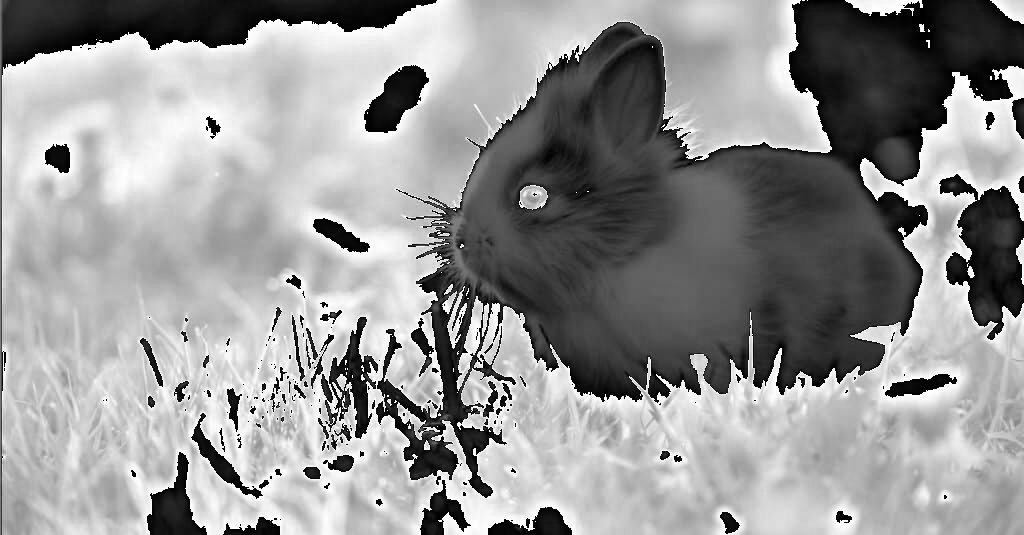

In [37]:
cv2_imshow(gray+128)

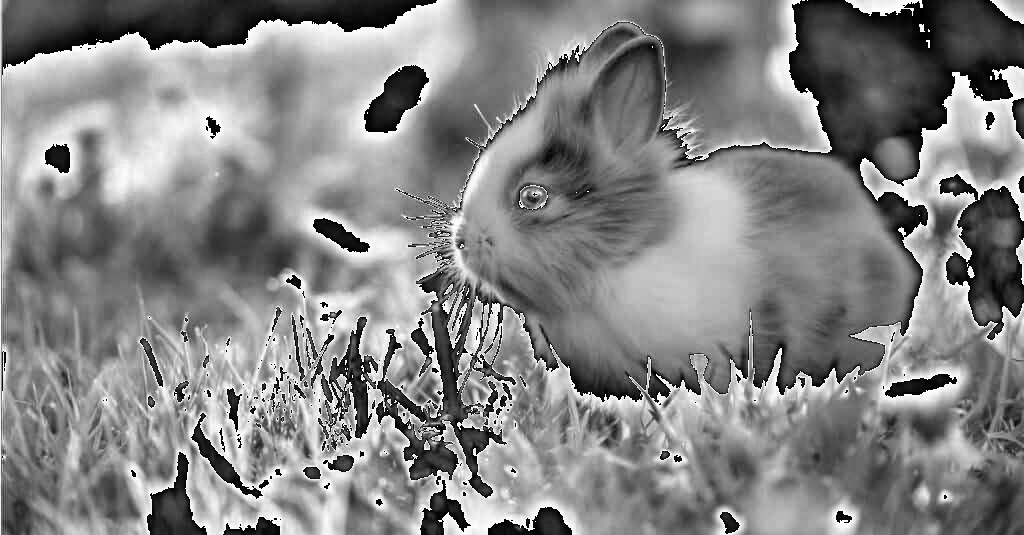

In [38]:
cv2_imshow(gray*2)

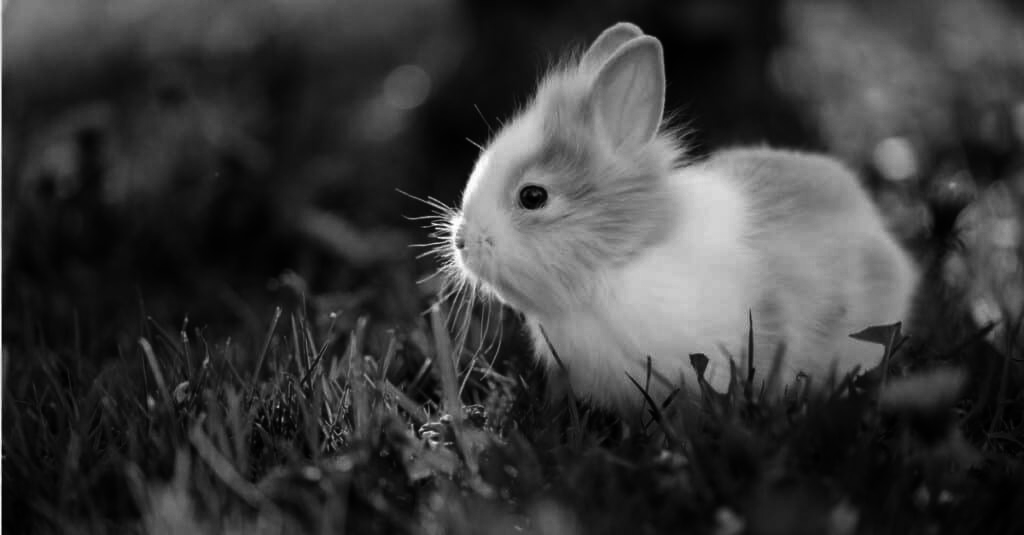

In [39]:
cv2_imshow(((gray/255)**2)*255)

### Task 2: The goal is to do neighborhood operations over the one-channel grayscale image.
The below is example for box average processing with cv2.filter2D() function.
See more details https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04


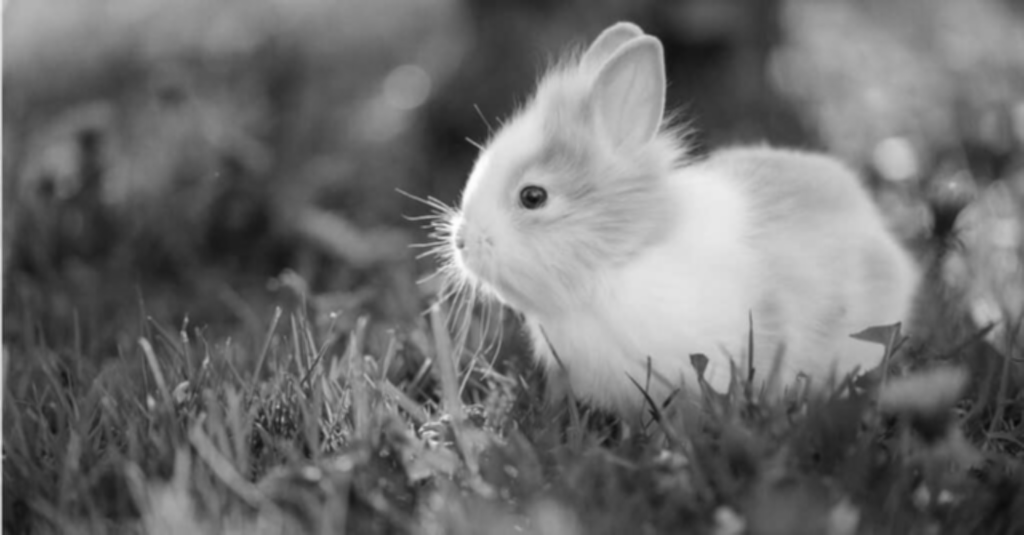

In [40]:
# Example for 3x3 box average array
box = np.array([[ 1.0/9, 1.0/9, 1.0/9],
                [ 1.0/9, 1.0/9, 1.0/9],
                [ 1.0/9, 1.0/9, 1.0/9]])


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.filter2D(gray, -1, box)

cv2_imshow(filtered_image)

### TODO: Create a custom kernel

*   **Gaussian Smooth Filter** shown in Page 47 *Slides: Image Filter* in Module, Canvas
*   **Sharpening Filter** shown in Page 57 *Slides: Image Filter* in Module, Canvas
*   **Horizontal/vertical Sober filter** shown in Page 71 *Slides: Image Filter* in Module, Canvas
*   Please try any others you design.








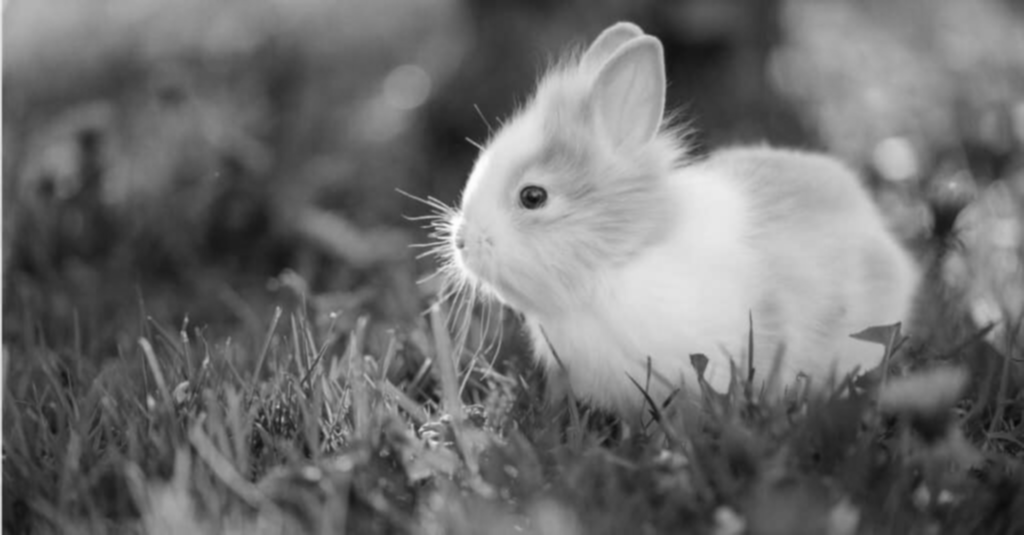

In [41]:

gaussian_kernel = np.array([[1/16, 2/16, 1/16],
                            [2/16, 4/16, 2/16],
                            [1/16, 2/16, 1/16]])

filtered_image = cv2.filter2D(gray, -1, gaussian_kernel)

cv2_imshow(filtered_image)

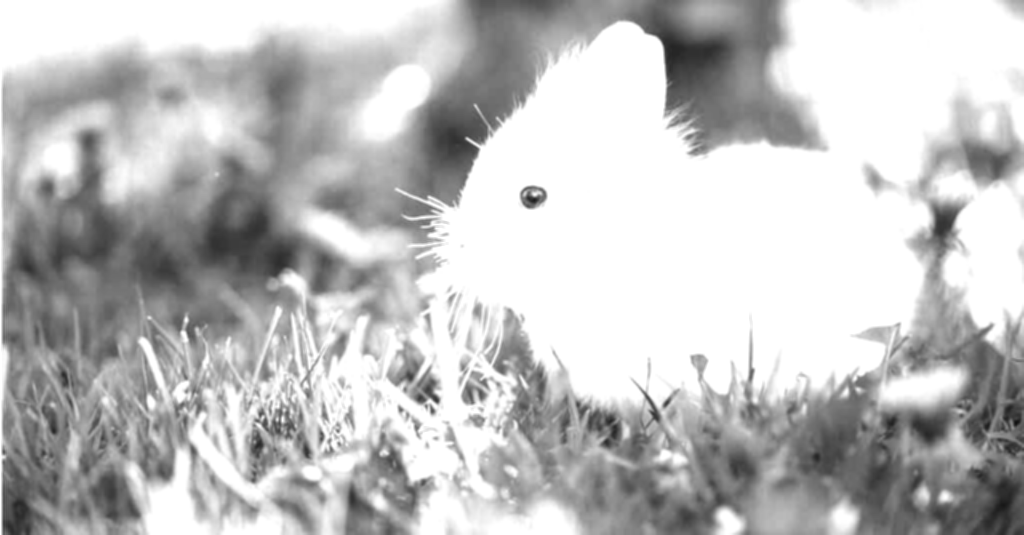

In [42]:
filter_kernel = np.array([[0, 0, 0],
                          [0, 2, 0],
                          [0, 0, 0]])

filtered_image = cv2.filter2D(gray, -1, filter_kernel)
sharpening_kernel = np.array([[1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9]])

sharpening_image = cv2.filter2D(filtered_image, -1, sharpening_kernel)
cv2_imshow(sharpening_image)



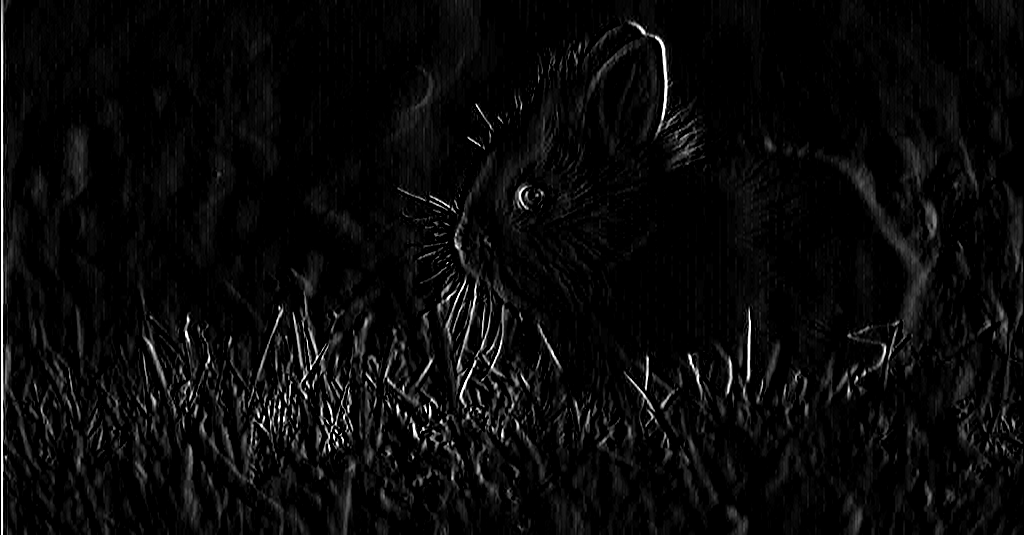

In [46]:
Horizontal_kernel = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]])
Horizontal_image = cv2.filter2D(gray, -1, Horizontal_kernel)

cv2_imshow(Horizontal_image)


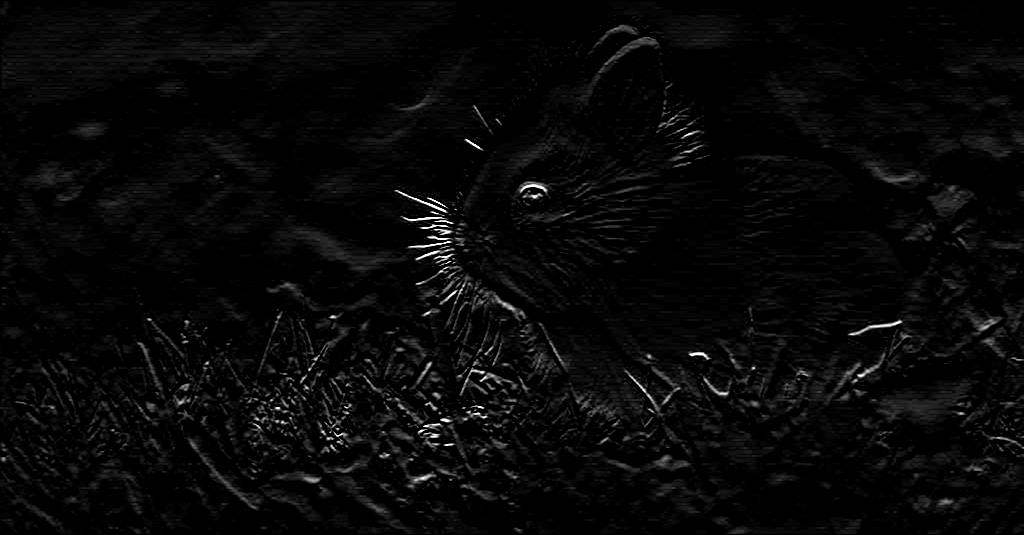

In [48]:
Vertical_kernel = np.array([[1, 2, 1],
                          [0, 0, 0],
                          [-1, -2,-1]])
Vertical_image = cv2.filter2D(gray, -1, Vertical_kernel)

cv2_imshow(Vertical_image)


Sobel

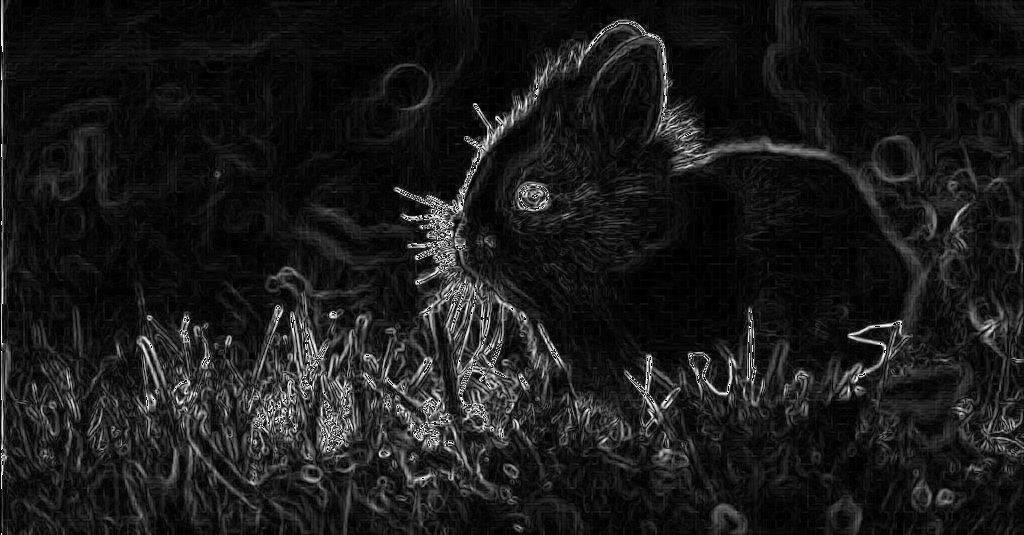

In [52]:
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = np.uint8(sobel_combined)
cv2_imshow(sobel_combined)